# Домашнее задание №1: Сплит система - по дисциплине: «Онлайн эксперименты и казуальный анализ»

<hr style="border: 1px solid rgba(50, 50, 255, 0.5); width: 100%;">

Выполнил:  
**Вольхин Данил Федорович**

Email:  
[dfvolkhin@edu.hse.ru](mailto:dfvolkhin@edu.hse.ru)

Дата:  
**19 февраля 2025**

<hr style="border: 1px solid rgba(50, 50, 255, 0.5); width: 100%;">

😊 Первый раз в жизни делаю посадку на юпитер 😊

## ANSI коды для цветов текста

In [1]:
# ANSI коды для цветов текста
RED = "\033[31m"
GREEN = "\033[32m"
YELLOW = "\033[33m"
BLUE = "\033[34m"
RESET = "\033[0m"  # сброс цветов до стандартных

## Шаблоны markdown

<span style="color: green;"># Это комментарий в коде</span><br>
<span style="color: blue;">def</span> greet(name):<br>
<span style="color: red;">print</span>(f"Hello, {name}!")
<hr style="border: 1px solid rgba(50, 50, 255, 0.5); width: 100%;">
<pre style="background-color: #F5F5F5; padding: 10px; border-radius: 5px; font-family: monospace;">code</pre>

## Установка библиотек (Необязательно)

In [2]:
# !pip install pydantic==2.10.3
# !pip install tqdm==4.66.2
# !pip install scipy==1.13.1
# !pip install seaborn==0.13.2
# !pip install rich==13.7.1
# !pip install requests==2.32.3
# !pip install pandas==2.2.2
# !pip install matplotlib==3.9.2
# !pip install duckdb==1.1.0
# !pip install annotated-types==0.7.0

# Подготовка к написанию кода

## Импорт библиотек

In [3]:
print(f"{YELLOW}"+60*"-"+f"{RESET}")
print(f"Библиотеки: \n")

# Дополнительные библиотеки
import platform # Узнать версию пайтона ;)
import os
import logging
import time
import sys
import random
import re
import shutil
import hashlib
from tqdm import tqdm
from functools import wraps
from typing import Any, Tuple, Union, Optional, List, Type, Callable, Dict
from collections import Counter
from dataclasses import dataclass
import requests
from pathlib import Path
from collections import defaultdict
from itertools import combinations
from datetime import datetime
import multiprocessing as mp
import random
from concurrent.futures import ThreadPoolExecutor

# Основные библиотеки
import IPython.display as ipd # Добавляет виджеты для ячеек юпитера
from IPython.display import HTML
from IPython import get_ipython
import ipykernel
print(f"python: {BLUE}{platform.python_version()}{RESET} ")
import matplotlib # Для рисунков
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.gridspec as gridspec
print(f"matplotlib: {BLUE}{matplotlib.__version__}{RESET}")
import seaborn as sns
print(f"seaborn: {BLUE}{sns.__version__}{RESET}")
import numpy as np # Для работы с массивами
print(f"numpy: {BLUE}{np.__version__}{RESET}")
import pandas as pd # Работа с таблицами
print(f"pandas: {BLUE}{pd.__version__}{RESET}")
import scipy
from scipy.stats import wasserstein_distance, ks_2samp, levene, gaussian_kde
from scipy.stats import energy_distance, ks_2samp
from scipy.stats import skew, kurtosis
from scipy.spatial.distance import euclidean
print(f"scipy: {BLUE}{scipy.__version__}{RESET}")
import pydantic # Для валидации данных
from pydantic import (BaseModel, Field, StrictStr, condecimal, StrictInt, StrictBool,
                      FilePath, DirectoryPath, ValidationError, root_validator, ConfigDict)
print(f"pydantic: {BLUE}{pydantic.__version__}{RESET}")
import requests
print(f"requests: {BLUE}{requests.__version__}{RESET}")
import duckdb as db
print(f"duckdb: {BLUE}{db.__version__}{RESET}")
import sklearn
from sklearn.metrics import mean_squared_error
print(f"sklearn: {BLUE}{sklearn.__version__}{RESET}")
import dcor
print(f"dcor: {BLUE}{dcor.__version__}{RESET}")


from rich.theme import Theme
from rich.logging import RichHandler
from rich.console import Console
from rich.pretty import install as pretty_install
from rich.traceback import install as traceback_install


print(f"{YELLOW}"+60*"-"+f"{RESET}")

------------------------------------------------------------
Библиотеки: 

python: 3.10.0 
matplotlib: 3.9.2
seaborn: 0.13.2
numpy: 1.26.4
pandas: 2.2.2
scipy: 1.13.1
pydantic: 2.10.3
requests: 2.32.3
duckdb: 1.1.0
sklearn: 1.5.1
dcor: 0.6
------------------------------------------------------------


## Дополнительные настройки

In [4]:
import warnings
warnings.filterwarnings("ignore")
import logging
# Отключение логирования для cmdstanpy
logging.getLogger('cmdstanpy').setLevel(logging.ERROR)
# Полезна при разработке собственных библиотек, юпитер будет переимпортировать модули, если в них были изменения
%load_ext autoreload
%autoreload 1

# Описание домашнего задания

[Ссылка на набор данных](https://disk.yandex.ru/d/2mH8fuKCKLeozg)

<hr style="border: 1px solid rgba(50, 50, 255, 0.5); width: 100%;">

<span style="color: green;">Написать свою сплит систему для проведения A/B тестов.</span><br>

Задание:
<pre style="background-color: #888888; padding: 10px; border-radius: 5px; font-family: monospace;">
    <span style="color: white;">
    Задача:
        1. Написать алгоритм, которые разбивает данные на 3 группы размера около 5000, которые будут считаться "похожими".
        2. Для этого вам самостоятельно нужно решить, какие критерии схожести тут применимы и построить необходимые 
           тесты для выбора этих групп.  
        3. Данные 3 группы должны считаться похожими на основе ваших метрик.
        4. Разбиение затем будет протестировано на следующих 2х годах нами. 
        5. Визуализировать распределения выбранных вами метрик для найденных групп и сравнить с аналогичными
           разультатами для случайных групп

    Нужно реализовать следующие функции (вы можете добавлять какие-то побочные, если считаете нужным):
        1. generate_groups - функция, которая по данным и числу групп делает случайное разбиение данных на примерно
           динаковые части по количеству групп
        2. conduct_test_on_pair - функция проводит статистические тесты между двумя данными группами и возвращает
           нужные статистики и результаты
        3. conduct_tests -- по списку групп и количеству необходимых похожих групп (зафиксировано в условии задачи как 3)
           перебирает возможные тройки групп пока не найдет похожие, критерий остановки за вами
        4. find_groups -- берет данные и число групп, на которое вы их разбиваете и ищет 3 группы удовлетворяющие
           вашим критериям схожести.

    Группы должны состоять из уникальных клиентов без дубликатов, один клиент может быть только в одной группе.
    То есть должны выбирать группы из датасета без повторений и у групп не должно быть пересечений.

    Про то, по каким параметрам оценивать группы: в этом задании вам требуется найти группы, в которых распределения
    средних значений и дисперсии данной последовательности по пользователям похожи. То есть вам нужно вычислить
    среднее значение и дисперсию данной последовательности для каждого пользователя, а затем проверить, что
    распределения результатов между группами схожи по вашим тестам.

    Замечание: Для разбиения на группы и сравнения похожести можете брать любую метрику и считать любой критерии,
    но мы будем сравнивать именно метрику «среднее» и дисперсию на следующих по времени данных.
    </span>
</pre>

<hr style="border: 1px solid rgba(50, 50, 255, 0.5); width: 100%;">

# Решение

## Работа с данными

### Просмотр

In [5]:
df = pd.read_csv("./train_data.csv")

In [6]:
df.head()

,2019-01-01,2019-01-02,2019-01-03,2019-01-04,2019-01-05,2019-01-06,2019-01-07,2019-01-08,2019-01-09,2019-01-10,...,2020-12-21,2020-12-22,2020-12-23,2020-12-24,2020-12-25,2020-12-26,2020-12-27,2020-12-28,2020-12-29,2020-12-30
0,-3.533155,-4.475755,-4.748074,-5.569953,-8.017896,-12.396771,-11.853961,-12.046498,-10.297042,-10.075553,...,-168.163849,-168.728405,-168.971555,-168.824042,-167.700081,-167.634364,-167.856116,-168.743465,-168.231590,-167.913551
1,-3.824475,-1.530769,0.038338,-1.475237,-1.602029,-0.992509,0.302906,1.789140,4.177589,9.273372,...,75.919063,72.909418,75.289867,77.770907,74.099941,72.411474,67.472791,67.084800,66.805609,72.078232
2,-1.616434,-4.658834,-6.746498,-9.979424,-11.683396,-9.507703,-7.614438,-9.735666,-10.754863,-11.058539,...,47.759469,46.596598,50.135737,48.424880,47.740658,46.676116,45.611939,43.331310,45.655325,39.770838
3,-0.157282,1.827617,-2.585284,-4.397189,0.113494,7.614615,5.456654,5.928451,6.953534,4.514409,...,318.364962,319.281629,322.614999,325.200268,324.745069,326.519830,326.467326,321.806523,321.286907,323.570847
4,2.056969,10.187929,8.559520,8.579555,9.464262,9.038088,10.875990,9.883777,8.026472,13.040411,...,-38.079584,-38.515039,-38.031876,-36.610698,-37.753387,-35.470938,-35.454435,-35.026979,-35.633306,-35.460477


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Columns: 730 entries, 2019-01-01 to 2020-12-30
dtypes: float64(730)
memory usage: 278.5 MB


### Предобработка

In [8]:
def preprocess_data(df):
    """Вычисляем средние и дисперсии для каждого пользователя"""
    df['user_mean'] = df.mean(axis=1)
    df['user_var'] = df.var(axis=1)
    return df

In [9]:
df = preprocess_data(df)

In [10]:
df["user_id"] = df.index

In [11]:
df.head()

,2019-01-01,2019-01-02,2019-01-03,2019-01-04,2019-01-05,2019-01-06,2019-01-07,2019-01-08,2019-01-09,2019-01-10,...,2020-12-24,2020-12-25,2020-12-26,2020-12-27,2020-12-28,2020-12-29,2020-12-30,user_mean,user_var,user_id
0,-3.533155,-4.475755,-4.748074,-5.569953,-8.017896,-12.396771,-11.853961,-12.046498,-10.297042,-10.075553,...,-168.824042,-167.700081,-167.634364,-167.856116,-168.743465,-168.231590,-167.913551,-105.973217,3247.277778,0
1,-3.824475,-1.530769,0.038338,-1.475237,-1.602029,-0.992509,0.302906,1.789140,4.177589,9.273372,...,77.770907,74.099941,72.411474,67.472791,67.084800,66.805609,72.078232,61.399699,1059.359733,1
2,-1.616434,-4.658834,-6.746498,-9.979424,-11.683396,-9.507703,-7.614438,-9.735666,-10.754863,-11.058539,...,48.424880,47.740658,46.676116,45.611939,43.331310,45.655325,39.770838,20.350199,352.692926,2
3,-0.157282,1.827617,-2.585284,-4.397189,0.113494,7.614615,5.456654,5.928451,6.953534,4.514409,...,325.200268,324.745069,326.519830,326.467326,321.806523,321.286907,323.570847,187.578708,7526.069435,3
4,2.056969,10.187929,8.559520,8.579555,9.464262,9.038088,10.875990,9.883777,8.026472,13.040411,...,-36.610698,-37.753387,-35.470938,-35.454435,-35.026979,-35.633306,-35.460477,-1.222751,148.757315,4


## Визуализация

### Класс TimeSeriesVisualizer

In [12]:
class TimeSeriesVisualizer:
    """Визуализация и сравнение временных рядов и распределений для групп пользователей.
    
    Attributes:
        date_columns (list): Список колонок с датами для временных рядов
        log_scale (bool): Применять логарифмическое преобразование данных или нет
    """
    
    def __init__(self, date_columns: list, log_scale: bool = True):
        self.date_columns = date_columns
        self.log_scale = log_scale
        self.colors = plt.cm.tab10.colors
        self.hist_bins = 25
        self.alpha = 0.7
        self.global_ylim = None

    def compare_groups(self, random_groups: list, optimized_groups: list):
        """Основной метод для построения сравнительных графиков."""
        self._calculate_global_ylim(random_groups + optimized_groups)
        fig = self._create_figure_layout()
        self._plot_group_comparison(fig, random_groups, optimized_groups)
        plt.tight_layout()
        plt.show()

    def _create_figure_layout(self) -> plt.Figure:
        """Создает сложную сетку для размещения графиков."""
        fig = plt.figure(figsize=(20, 40))
        gs = gridspec.GridSpec(4, 2, height_ratios=[2, 1, 2, 1], hspace=0.4, wspace=0.3)
        self.axes = {
            'random_ts': fig.add_subplot(gs[0, :]),
            'random_mean': fig.add_subplot(gs[1, 0]),
            'random_var': fig.add_subplot(gs[1, 1]),
            'optim_ts': fig.add_subplot(gs[2, :]),
            'optim_mean': fig.add_subplot(gs[3, 0]),
            'optim_var': fig.add_subplot(gs[3, 1])
        }
        return fig

    def _plot_group_comparison(self, fig: plt.Figure, random_groups: list, optimized_groups: list):
        """Отрисовывает все компоненты сравнения групп."""
        self._plot_time_series(self.axes['random_ts'], random_groups, "Случайные группы")
        self._plot_histograms(
            self.axes['random_mean'], 
            self.axes['random_var'], 
            random_groups, 
            "Случайные"
        )
        self._plot_time_series(self.axes['optim_ts'], optimized_groups, "Оптимизированные группы")
        self._plot_histograms(
            self.axes['optim_mean'], 
            self.axes['optim_var'], 
            optimized_groups, 
            "Оптимизированные"
        )
        self._configure_axes_labels()

    def _calculate_global_ylim(self, groups: list):
        """Вычисляет единые пределы для масштабирования графиков."""
        all_means = [group[self.date_columns].mean().values for group in groups]
        flat_means = np.concatenate(all_means)
        padding = (np.max(flat_means) - np.min(flat_means)) * 0.05
        self.global_ylim = (np.min(flat_means) - padding, np.max(flat_means) + padding)

    def _plot_time_series(self, ax: plt.Axes, groups: list, title: str):
        """Визуализация временных рядов для группы."""
        dates = [datetime.strptime(d, '%Y-%m-%d') for d in self.date_columns]
        
        for i, group in enumerate(groups):
            ts_values = group[self.date_columns].mean()
            ax.plot(
                dates, 
                ts_values,
                color=self.colors[i % len(self.colors)],
                linewidth=1.5,
                alpha=0.8,
                label=f"Группа {i+1}"
            )
        
        ax.set_ylim(*self.global_ylim)
        ax.xaxis.set_major_locator(mdates.MonthLocator(interval=2))
        ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
        ax.set_title(title, fontsize=12, pad=15)
        ax.grid(alpha=0.3)
        ax.legend(loc='upper left', bbox_to_anchor=(1.02, 1))
        plt.setp(ax.get_xticklabels(), rotation=45, ha='right')

    def _plot_histograms(self, ax_mean: plt.Axes, ax_var: plt.Axes, groups: list, prefix: str):
        """Отрисовывает парные гистограммы распределений."""
        log_label = " (log(x))" if self.log_scale else ""
        
        for i, group in enumerate(groups):
            color = self.colors[i % len(self.colors)]
            
            # Гистограмма для средних значений
            self._plot_single_histogram(
                ax_mean, 
                self._apply_log_transform(group['user_mean']),
                color,
                label=f"{prefix} {i+1}"  # Передаем label как именованный аргумент
            )
            
            # Гистограмма для дисперсий
            self._plot_single_histogram(
                ax_var,
                self._apply_log_transform(group['user_var']),
                color,
                hatch='//',  # Передаем hatch как именованный аргумент
                edgecolor='white'  # Передаем edgecolor как именованный аргумент
            )
        
        ax_mean.set_title(f"{prefix}: Распределение средних", fontsize=10)
        ax_var.set_title(f"{prefix}: Распределение дисперсий", fontsize=10)

    def _plot_single_histogram(self, ax: plt.Axes, data: np.ndarray, color: str, **kwargs):
        """Универсальный метод построения гистограммы."""
        ax.hist(
            data,
            bins=self.hist_bins,
            color=color,
            alpha=self.alpha,
            density=True,
            **kwargs  # Передаем все дополнительные параметры
        )
        ax.grid(alpha=0.3)
        ax.set_facecolor('#f8f8f8')

    def _apply_log_transform(self, data: np.ndarray) -> np.ndarray:
        """Применяет логарифмическое преобразование с проверкой данных."""
        if not self.log_scale:
            return data
        
        min_val = data.min()
        if min_val <= 0:
            data = data - min_val + 1e-9
        return np.log1p(data)

    def _configure_axes_labels(self):
        """Устанавливает единые подписи для всех осей."""
        log_label = " (log(x))" if self.log_scale else ""
        
        for ax in [self.axes['random_mean'], self.axes['random_var'],
                   self.axes['optim_mean'], self.axes['optim_var']]:
            ax.set_xlabel(f"Значения{log_label}", fontsize=9)
            ax.set_ylabel("Плотность", fontsize=9)

## Поиск групп

### Класс ContextualThompsonSampling

In [15]:
class ContextualThompsonSampling:
    """Реализует контекстный алгоритм выборки Томпсона с расширенным контекстом."""
    
    def __init__(self, context_dim: int, n_actions: int):
        self.context_dim = context_dim
        self.n_actions = n_actions
        self.B = [np.eye(context_dim) for _ in range(n_actions)]
        self.B_inv = [np.eye(context_dim).copy() for _ in range(n_actions)]  # Хранение обратных матриц
        self.mu = [np.zeros(context_dim) for _ in range(n_actions)]
        self.f = [np.zeros(context_dim) for _ in range(n_actions)]

    def select_action(self, context: np.ndarray) -> int:
        scores = []
        for action in range(self.n_actions):
            cov = np.linalg.pinv(self.B[action])
            mu_sample = np.random.multivariate_normal(self.mu[action], cov)
            scores.append(np.dot(mu_sample, context))
        return np.argmax(scores)

    def update(self, context: np.ndarray, action: int, reward: float):
        context = context.reshape(-1, 1)
        B_inv = self.B_inv[action]
        self.B[action] += context @ context.T
        
        # Лемма Шермана-Моррисона для обновления обратной матрицы
        numerator = B_inv @ context @ context.T @ B_inv
        denominator = 1 + (context.T @ B_inv @ context).item()
        self.B_inv[action] = B_inv - numerator / denominator
        
        self.f[action] += reward * context.flatten()
        self.mu[action] = self.B_inv[action] @ self.f[action]

### Класс GroupOptimizer

In [16]:
class GroupOptimizer:
    """Оптимизатор групп с учетом дневных метрик."""
    
    def __init__(self, df, group_size: int = 5000, n_groups: int = 3, n_actions: int = 2, salt=None):
        self.df = df.copy()
        self.group_size = group_size
        self.n_groups = n_groups
        self.n_actions = n_actions
        self.salt = salt or str(random.random())
        
        self._preprocess_data()
        self.base_group = self._create_base_group()
        self.remaining_data = self.df.drop(self.base_group.index)
        self.daily_matrix = self.df[self.numeric_cols].values  # Матрица дневных данных
        
        # Статистики базовой группы
        self.base_mean = self.base_group['user_mean'].mean()
        self.base_var = self.base_group['user_var'].mean()
        self.base_daily_means = self.base_group[self.numeric_cols].mean(axis=0).values
        self.base_stats = {
            'mean_dist': self.base_group['user_mean'].values,
            'var_dist': self.base_group['user_var'].values
        }

    def _preprocess_data(self):
        self.numeric_cols = self.df.columns.difference(['user_id', 'user_mean', 'user_var']).tolist()
        self.df['user_mean'] = self.df[self.numeric_cols].mean(axis=1)
        self.df['user_var'] = self.df[self.numeric_cols].var(axis=1)

    def generate_groups(self) -> list:
        """Создание группы посредством случайной выборки."""
        groups = [self.base_group]
        remaining_indices = self.df.drop(self.base_group.index).index.tolist()
        for _ in range(self.n_groups - 1):
            selected = random.sample(remaining_indices, self.group_size)
            groups.append(self.df.loc[selected])
            remaining_indices = list(set(remaining_indices) - set(selected))
        return groups

    def _create_base_group(self):
        hashes = self.df['user_id'].apply(
            lambda x: int(hashlib.md5((str(x) + self.salt).encode()).hexdigest(), 16) % 100
        )
        candidates = self.df[hashes <= 10]
        if len(candidates) < self.group_size:
            raise ValueError("Недостаточно кандидатов для базовой группы")
        return candidates.sample(self.group_size)

    def optimize_groups(self, n_candidates: int = 50) -> list:
        groups = [self.base_group]
        total_users_needed = self.group_size * (self.n_groups - 1)
        if len(self.remaining_data) < total_users_needed:
            raise ValueError("Недостаточно пользователей для формирования всех групп")
        
        for group_num in range(1, self.n_groups):
            current_group = self._build_single_group(n_candidates, group_num)
            groups.append(current_group)
            self.remaining_data = self.remaining_data.drop(current_group.index)
        return groups

    def _build_single_group(self, n_candidates: int, group_num: int) -> pd.DataFrame:
        current_indices = []
        remaining_indices = self.remaining_data.index.tolist()
        bandit = ContextualThompsonSampling(context_dim=3, n_actions=self.n_actions)
        selected_users = []

        with tqdm(total=self.group_size, desc=f"Формирование группы {group_num}") as pbar:
            for _ in range(self.group_size):
                candidates = self.remaining_data.loc[remaining_indices].sample(min(n_candidates, len(remaining_indices)))
                best_score = float('inf')
                best_candidate = None
                best_context = None

                for candidate_idx, candidate in candidates.iterrows():
                    temp_indices = current_indices + [candidate_idx]
                    # Расчет метрик
                    temp_user_mean = self.df.loc[temp_indices, 'user_mean'].values
                    temp_user_var = self.df.loc[temp_indices, 'user_var'].values
                    daily_means_temp = self.daily_matrix[temp_indices].mean(axis=0)
                    # Расчет схожести
                    score = self._calculate_group_similarity(temp_user_mean, temp_user_var, daily_means_temp)
                    # Выбор действия
                    context = self._calculate_user_context(candidate, daily_means_temp)
                    
                    if score < best_score:
                        best_score = score
                        best_candidate = candidate_idx
                        best_context = context

                if best_candidate is not None:
                    current_indices.append(best_candidate)
                    remaining_indices.remove(best_candidate)
                    selected_users.append(self.df.loc[best_candidate])
                    action = bandit.select_action(context)
                    bandit.update(best_context, action, -best_score)  # Награда обратно пропорциональна скору

                pbar.update(1)
                pbar.set_postfix({"Текущий счет": f"{best_score:.2f}"})

        return pd.DataFrame(selected_users)

    def _calculate_user_context(self, user: pd.Series, daily_means_temp: np.ndarray) -> np.ndarray:
        """Расширенный контекст с учетом дневных метрик."""
        base_deviation = np.mean(np.abs(user[self.numeric_cols].values - self.base_daily_means))
        temp_deviation = np.mean(np.abs(user[self.numeric_cols].values - daily_means_temp))
        return np.array([
            abs(user['user_mean'] - self.base_mean),
            abs(user['user_var'] - self.base_var),
            (base_deviation + temp_deviation) / 2  # Комбинированная метрика
        ])

    def _calculate_group_similarity(self, temp_user_mean: np.ndarray, temp_user_var: np.ndarray, daily_means_temp: np.ndarray) -> float:
        """Расширенная метрика схожести с учетом дневных данных."""
        metrics = {
            # 'ks_mean': ks_2samp(self.base_stats['mean_dist'], temp_user_mean).statistic,
            # 'ks_var': ks_2samp(self.base_stats['var_dist'], temp_user_var).statistic,
            # 'energy_mean': dcor.energy_distance(self.base_stats['mean_dist'], temp_user_mean),
            # 'energy_var': dcor.energy_distance(self.base_stats['var_dist'], temp_user_var),
            'wasserstein_mean': wasserstein_distance(self.base_stats['mean_dist'], temp_user_mean),
            'wasserstein_var': wasserstein_distance(self.base_stats['var_dist'], temp_user_var),
            # 'ks_daily': ks_2samp(self.base_daily_means, daily_means_temp).statistic,
            # 'energy_daily': dcor.energy_distance(self.base_daily_means, daily_means_temp),
            'wasserstein_daily': wasserstein_distance(self.base_daily_means, daily_means_temp)
        }
        
        variances = {k: np.var(list(metrics.values())) for k in metrics}
        total_variance = sum(variances.values())
        if total_variance == 0:
            weights = {k: 1/len(metrics) for k in metrics}
        else:
            weights = {k: (1 - v/total_variance) for k, v in variances.items()}
        
        sum_weights = sum(weights.values())
        weighted_score = sum(metrics[k] * weights[k]/sum_weights for k in metrics)
        return weighted_score

### Оптимизация

In [19]:
# Пример использования
optimizer = GroupOptimizer(df, group_size=5000, n_groups=3, n_actions=10, salt=None)
groups = optimizer.optimize_groups(n_candidates=30)
randoms = optimizer.generate_groups()

Формирование группы 2: 100%|████████████████████████████████| 5000/5000 [50:12<00:00,  1.66it/s, Текущий счет=58656.93]


### Визуализация

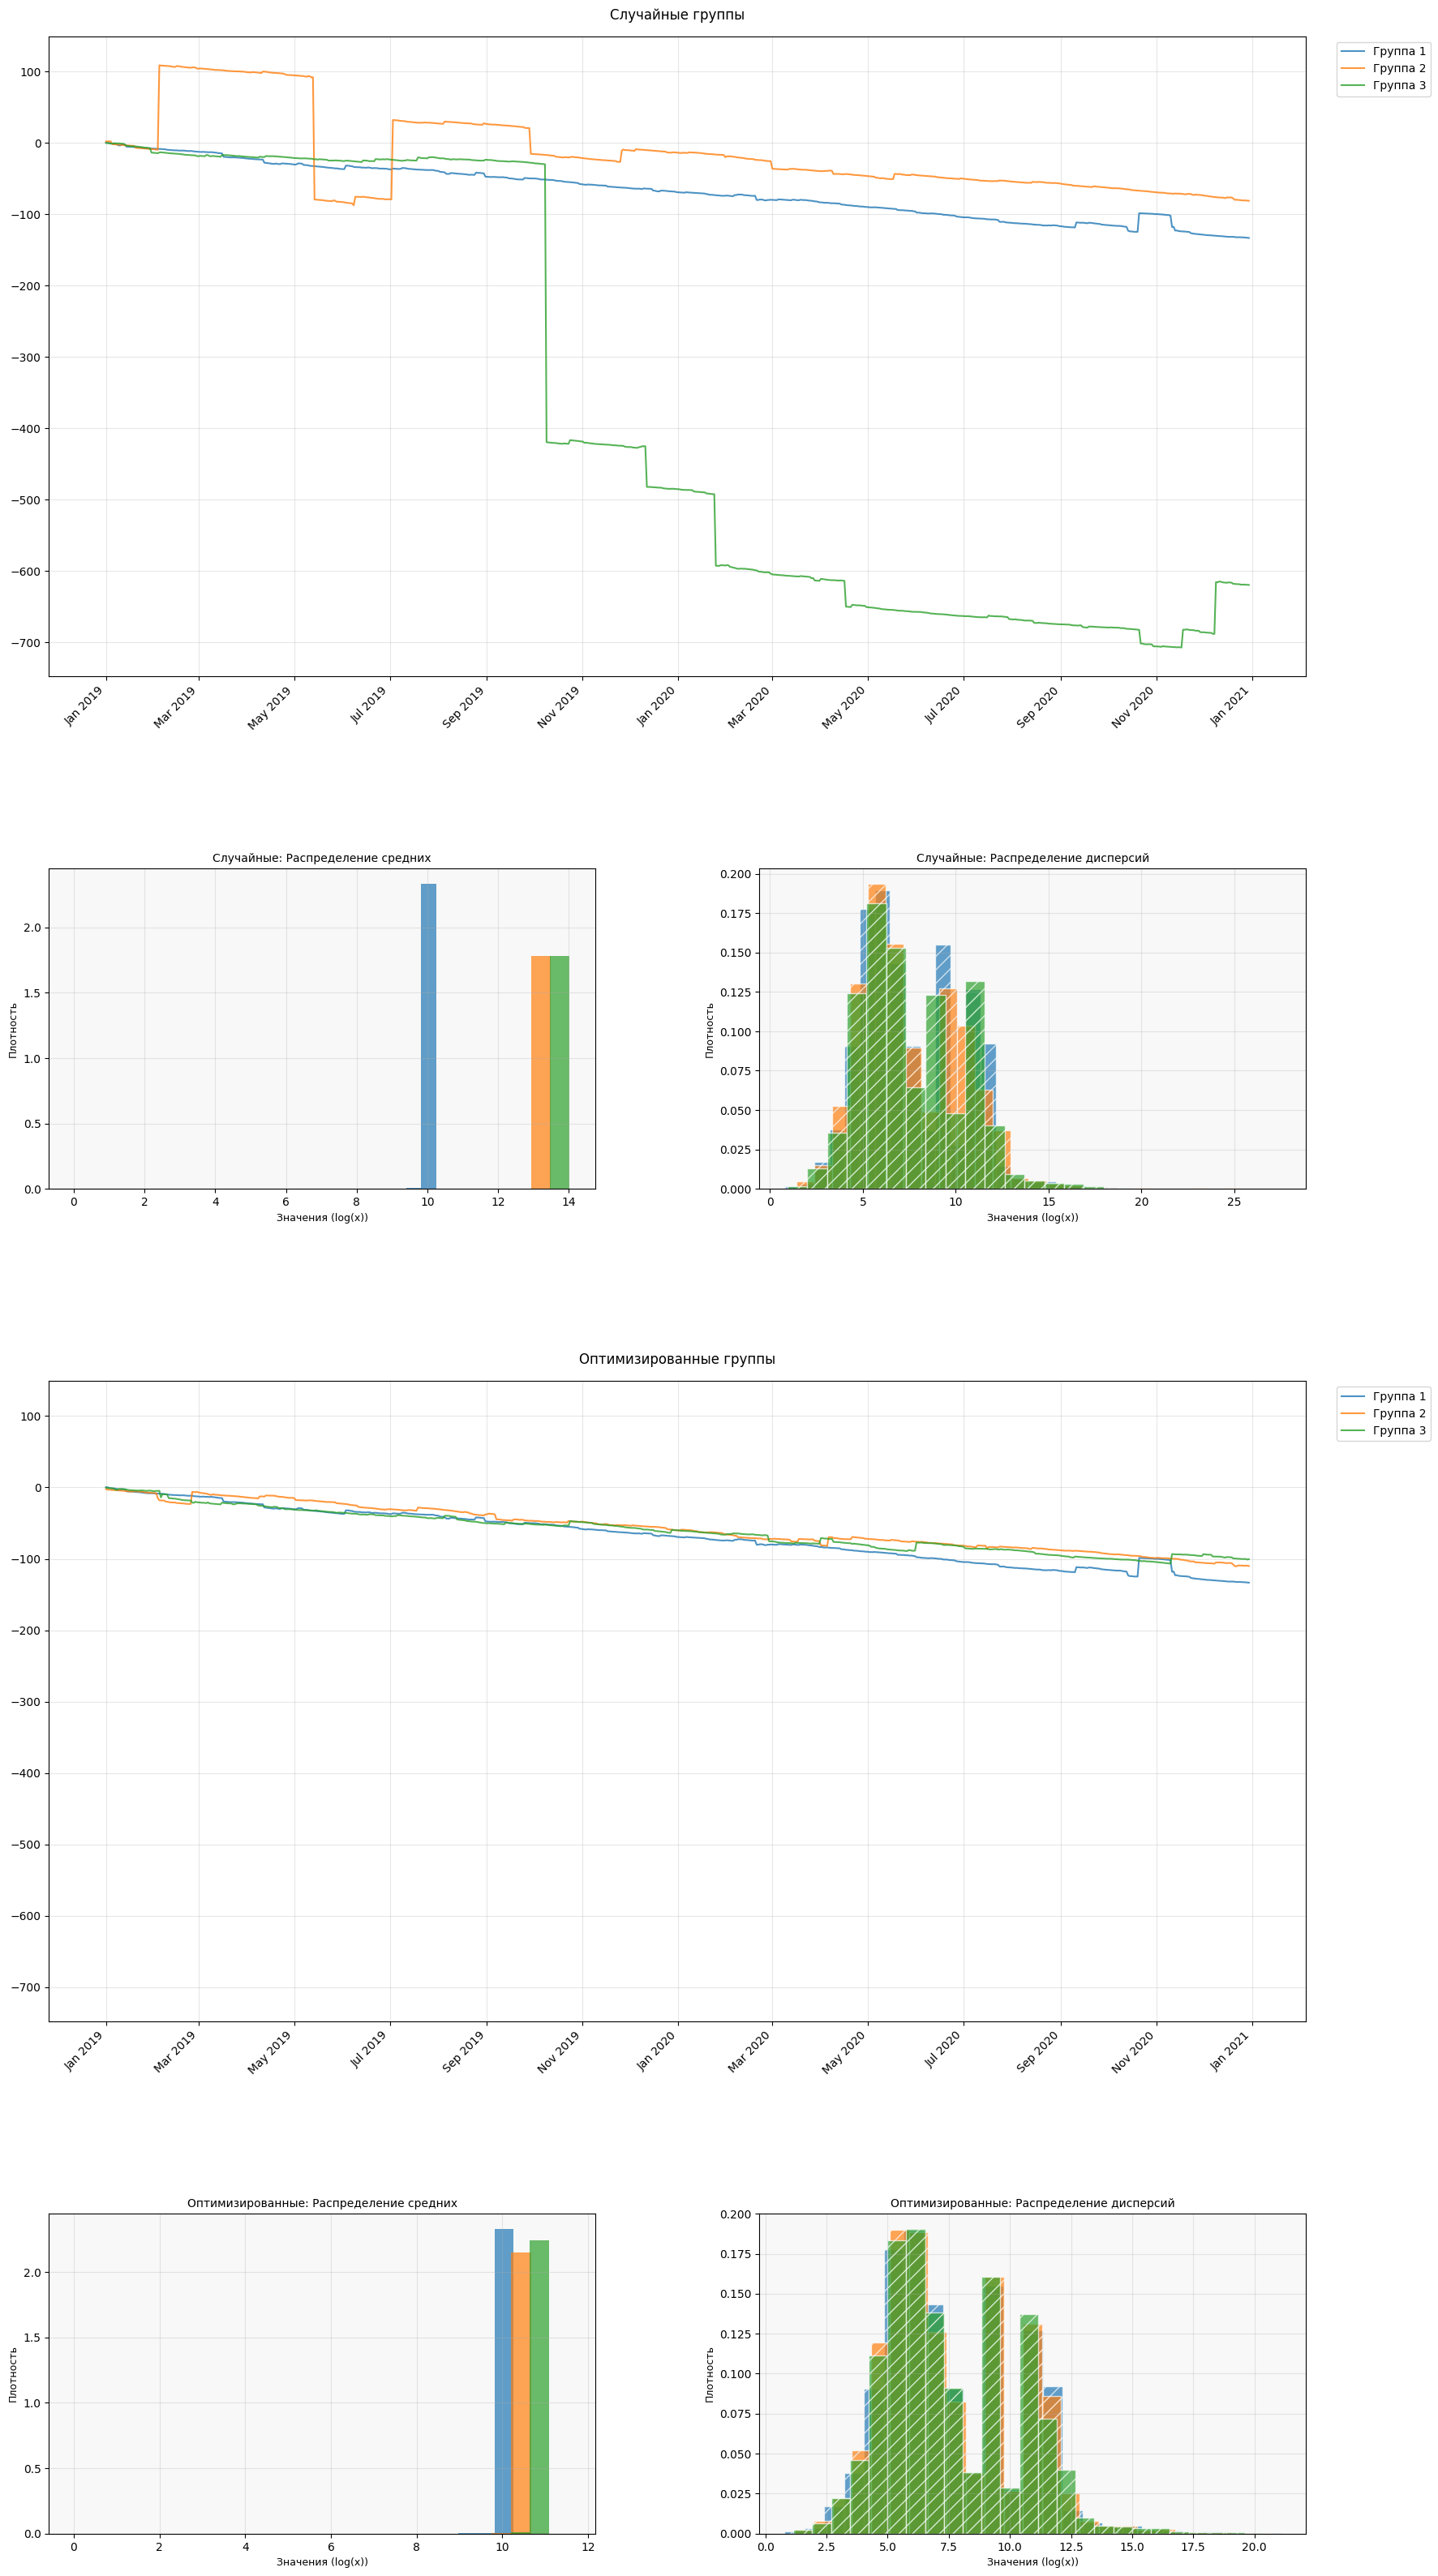

In [20]:
# Предположим, date_cols содержит список колонок с датами
date_cols = [col for col in df.columns if not col.startswith('user')]

# Визуализация
vis = TimeSeriesVisualizer(date_columns=date_cols, log_scale=True)
vis.compare_groups(
    random_groups=randoms,
    optimized_groups=groups
)

# Выводы

<hr style="border: 1px solid rgba(50, 50, 255, 0.5); width: 100%;">

<pre style="background-color: #888888; padding: 10px; border-radius: 5px; font-family: monospace;">
    <span style="color: white;">
        Идея была следующая: хешированием бьем на бакеты данные, откладываем фиксированную группу заданного размера.
        Формируем n_groups - 1 заданных групп, иттеррируясь по количеству пользователей в фиксированной группе.
        На каждой иттерации семплируем выборку из n_candidates, из этой выборки бандит должен выбрать такого пользователя,
        чтобы итоговая метрика (между выборкой фиксированной группы и формирующейся) уменьшалась. Бандит получает в контекст
        информацию о среднем и дисперсии каждого кандидата, чем более удачный выбор делает бандит в сторону уменьшения метрики,
        тем больше мы его награждаем. 
    </span>
</pre>

<hr style="border: 1px solid rgba(50, 50, 255, 0.5); width: 100%;">